
# IMPORTING THE DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [ ]:
df = pd.read_csv("/content/BA_reviews.csv", index_col = 0 )
df

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...
...,...
995,Not Verified | Glasgow to Miami via London. G...
996,✅ Trip Verified | London Heathrow to Budapest...
997,✅ Trip Verified | Budapest to London Heathrow...
998,✅ Trip Verified | London to Toronto. Group of...


# DATA CLEANING

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

import re


In [ ]:
df['reviews'] = df['reviews'].str.replace('Trip Verified', '')
df['reviews'] = df['reviews'].str.replace('Not Verified', '')
df['reviews'] = df['reviews'].str.replace('✅' ,  '')
df['reviews'] = df['reviews'].str.replace('|', '')
df['reviews'] = df['reviews'].str.replace('âœ…', '')
df

<ipython-input-6-1263453ab93d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace('|', '')


,reviews
0,My family and I have flown mostly on Briti...
1,This has been by far the worst service I h...
2,In Nov 2022 I booked and paid for a return...
3,BA is not treating its premium economy passe...
4,24 hours before our departure on BA059 to ...
...,...
995,Glasgow to Miami via London. Glasgow to Hea...
996,London Heathrow to Budapest. After so much...
997,Budapest to London Heathrow. The flight de...
998,London to Toronto. Group of 10 people age ...


In [ ]:
df.head()

,reviews
0,My family and I have flown mostly on Briti...
1,This has been by far the worst service I h...
2,In Nov 2022 I booked and paid for a return...
3,BA is not treating its premium economy passe...
4,24 hours before our departure on BA059 to ...


In [ ]:
df.shape

(1000, 1)

In [ ]:
df['reviews'] = df['reviews'].str.replace(r'.{6}(python)', r'\1', regex=True)
df

,reviews
0,My family and I have flown mostly on Briti...
1,This has been by far the worst service I h...
2,In Nov 2022 I booked and paid for a return...
3,BA is not treating its premium economy passe...
4,24 hours before our departure on BA059 to ...
...,...
995,Glasgow to Miami via London. Glasgow to Hea...
996,London Heathrow to Budapest. After so much...
997,Budapest to London Heathrow. The flight de...
998,London to Toronto. Group of 10 people age ...


In [ ]:
df.head()

,reviews
0,My family and I have flown mostly on Briti...
1,This has been by far the worst service I h...
2,In Nov 2022 I booked and paid for a return...
3,BA is not treating its premium economy passe...
4,24 hours before our departure on BA059 to ...


# EDA

In [ ]:
text = ' '.join(df['reviews']).lower().split()

In [ ]:
freq_words = pd.Series(text).value_counts()[:50]
freq_words

the        7228
to         5139
and        4327
was        3294
a          3141
i          3008
of         1951
in         1916
on         1783
for        1652
flight     1394
with       1349
my         1297
we         1156
is         1098
that       1094
they       1075
not        1054
were        999
at          974
it          967
ba          938
but         915
had         878
this        855
have        843
no          763
as          751
from        689
very        596
you         553
me          542
service     530
an          527
so          519
be          506
our         505
are         467
there       417
london      415
seat        413
food        410
crew        400
one         397
british     389
when        387
their       385
which       379
by          378
would       371
dtype: int64

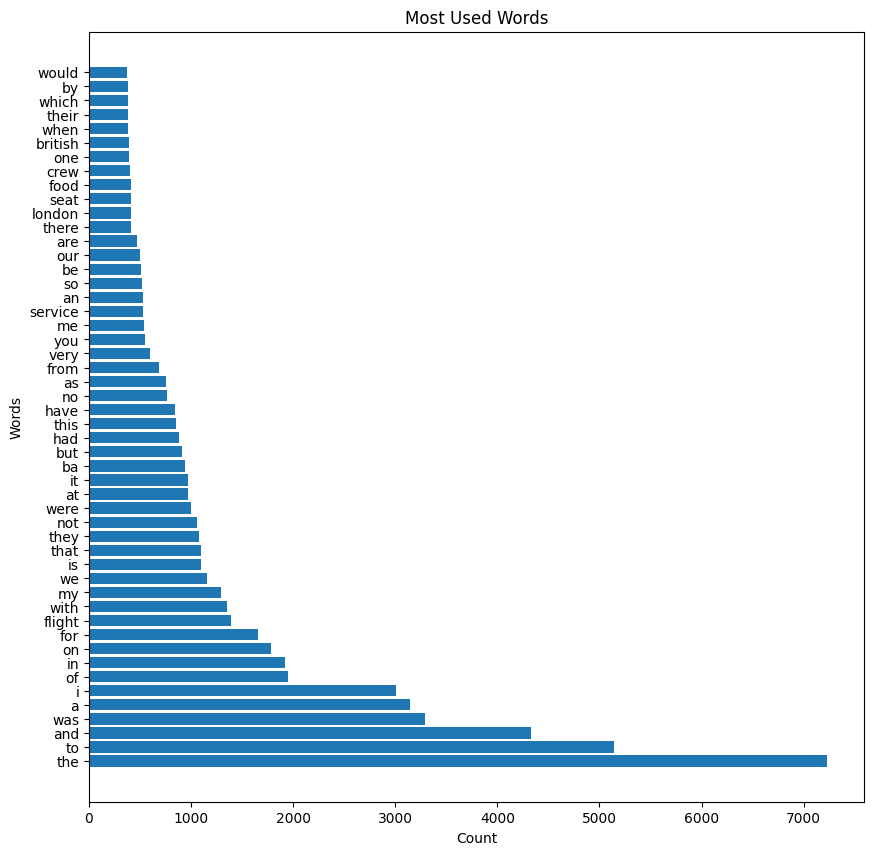

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(freq_words.index, freq_words.values)  # Use barh() for horizontal bar chart
plt.xlabel('Count')  # Switch x-label and y-label
plt.ylabel('Words')
plt.title('Most Used Words')

plt.show()













In [ ]:
categories = ['positive','negative']
num = len(categories)
num

2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tf_idf_vect = TfidfVectorizer (lowercase = True,
stop_words='english',
ngram_range = (1,1),
tokenizer = tokenizer.tokenize)

In [ ]:
data1 = tf_idf_vect.fit_transform(df['reviews'])
data1

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1000x7347 sparse matrix of type '<class 'numpy.float64'>'
	with 57070 stored elements in Compressed Sparse Row format>

In [ ]:
data1.shape

(1000, 7347)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num).fit(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = kmeans.labels_
labels

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [ ]:
df_reviews = pd.DataFrame({'review': df['reviews'], 'label': labels})
df_reviews

,review,label
0,My family and I have flown mostly on Briti...,1
1,This has been by far the worst service I h...,1
2,In Nov 2022 I booked and paid for a return...,0
3,BA is not treating its premium economy passe...,1
4,24 hours before our departure on BA059 to ...,1
...,...,...
995,Glasgow to Miami via London. Glasgow to Hea...,1
996,London Heathrow to Budapest. After so much...,1
997,Budapest to London Heathrow. The flight de...,1
998,London to Toronto. Group of 10 people age ...,1


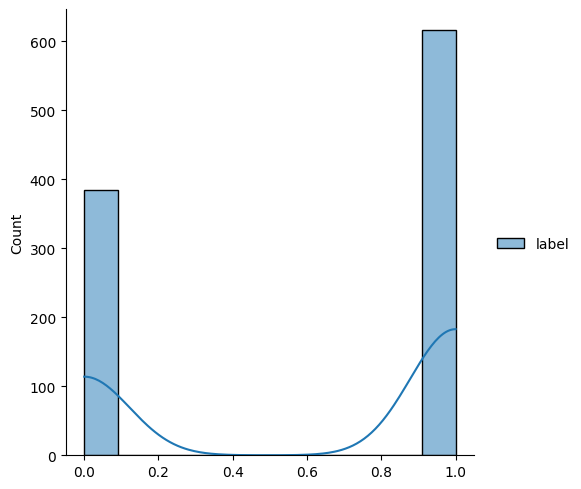

In [ ]:
import seaborn as sns
sns.displot(df_reviews, kde=True)

In [ ]:
positive_review = df_reviews[df_reviews['label']==1]
positive_review

,review,label
0,My family and I have flown mostly on Briti...,1
1,This has been by far the worst service I h...,1
3,BA is not treating its premium economy passe...,1
4,24 hours before our departure on BA059 to ...,1
7,Airport check in was functionary with littl...,1
...,...,...
995,Glasgow to Miami via London. Glasgow to Hea...,1
996,London Heathrow to Budapest. After so much...,1
997,Budapest to London Heathrow. The flight de...,1
998,London to Toronto. Group of 10 people age ...,1


In [ ]:
negative_review = df_reviews[df_reviews['label']== 0]
negative_review

,review,label
2,In Nov 2022 I booked and paid for a return...,0
5,We arrived at Heathrow at 0600 to find our...,0
6,Original flight was cancelled with no expl...,0
9,Came from Glasgow to London and took conne...,0
10,My flight on on 12 May 2023 got delayed an...,0
...,...,...
978,Dublin to London. I was trying to add additi...,0
980,I was in Prague flying British Airways bac...,0
982,We flew from Los Angeles to Leeds Bradford ...,0
990,Heraklion to Gatwick. Left my luggage behi...,0


In [ ]:
len(positive_review)

616

In [ ]:
len(negative_review)

384